In [62]:
import os
import torch
import numpy as np
from torchvision import transforms
from torch.utils.data import Dataset, TensorDataset
from avalanche.benchmarks.utils import (
    AvalancheDataset,
    AvalancheSubset,
    AvalancheTensorDataset,
)
from avalanche.benchmarks.generators import nc_benchmark, ni_benchmark
from avalanche.benchmarks.scenarios.generic_benchmark_creation import (
    create_multi_dataset_generic_benchmark,
)

test_images = np.load("./brightness/test/test_images.npy")
test_labels = np.load("./brightness/test/test_labels.npy")
train_images = np.load("./brightness/train/train_images.npy")
train_labels = np.load("./brightness/train/train_labels.npy")

# Convert NumPy arrays to PyTorch tensors
test_images_tensor = torch.tensor(test_images)
test_labels_tensor = torch.tensor(test_labels)
train_images_tensor = torch.tensor(train_images)
train_labels_tensor = torch.tensor(train_labels)

# Create TensorDataset
test = TensorDataset(test_images_tensor, test_labels_tensor)
train = TensorDataset(train_images_tensor, train_labels_tensor)

scenario = nc_benchmark(
    train,
    test,
    n_experiences=10,
    shuffle=True,
    seed=42,
    task_labels=False,
)

scenario.original_classes_in_exp

[{2}, {6}, {1}, {8}, {4}, {5}, {0}, {9}, {3}, {7}]

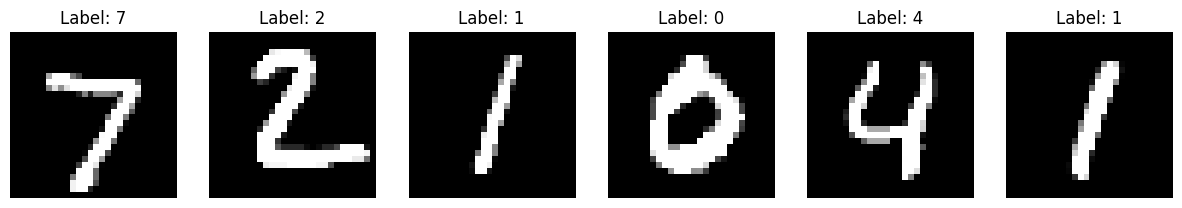

In [58]:
import matplotlib.pyplot as plt


# Define a function to show a preview of the dataset
def show_preview(dataset, num_samples=6):
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))

    for i in range(num_samples):
        image, label = dataset[i]
        if len(image.shape) == 3 and image.shape[0] == 1:
            # Remove the singleton channel dimension if present
            image = image.squeeze(0)
        axes[i].imshow(image.numpy(), cmap="gray")  # Display grayscale image
        axes[i].set_title(f"Label: {label}")
        axes[i].axis("off")

    plt.show()


# Show a preview of the dataset
show_preview(c_mnist)